<a href="https://colab.research.google.com/github/ZerXXX0/EDA-and-Data-Preprocessing-of-Netflix-s-Film-Data-from-Kaggle/blob/main/Preprocessing_%26_EDA_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflix_data = pd.read_csv('/content/imdb_movies_shows.csv')

In [ ]:
netflix_data

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0


In [ ]:
df = pd.DataFrame(netflix_data)

print(df)
print(df.describe())
print(df.info())

                                    title   type  release_year  \
0     Five Came Back: The Reference Films   SHOW          1945   
1                             Taxi Driver  MOVIE          1976   
2         Monty Python and the Holy Grail  MOVIE          1975   
3                           Life of Brian  MOVIE          1979   
4                            The Exorcist  MOVIE          1973   
...                                   ...    ...           ...   
5801                            Fine Wine  MOVIE          2021   
5802                       Edis Starlight  MOVIE          2021   
5803                                Clash  MOVIE          2021   
5804                       Shadow Parties  MOVIE          2021   
5805   Mighty Little Bheem: Kite Festival   SHOW          2021   

     age_certification  runtime                             genres  \
0                TV-MA       48                  ['documentation']   
1                    R      113                 ['crime', 'drama'] 

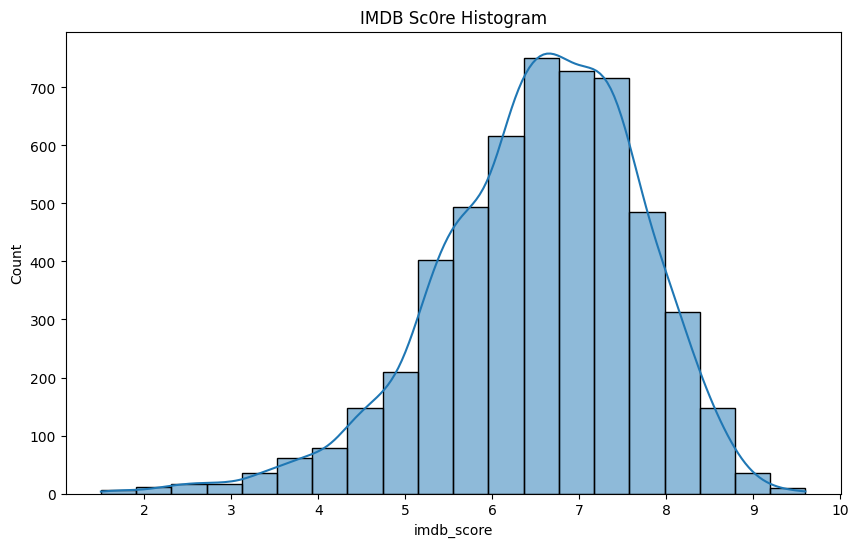

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['imdb_score'],bins=20,kde=True)
plt.title("IMDB Sc0re Histogram")
plt.show()

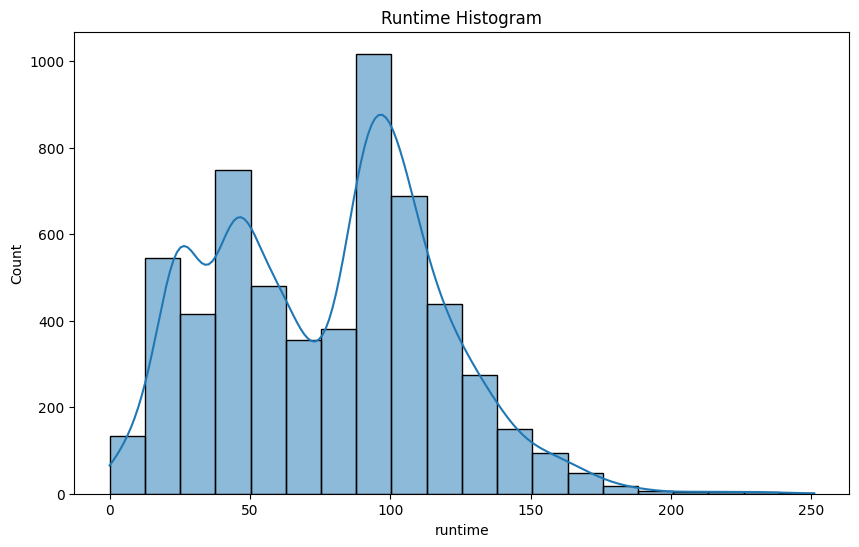

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['runtime'],bins=20,kde=True)
plt.title("Runtime Histogram")
plt.show()

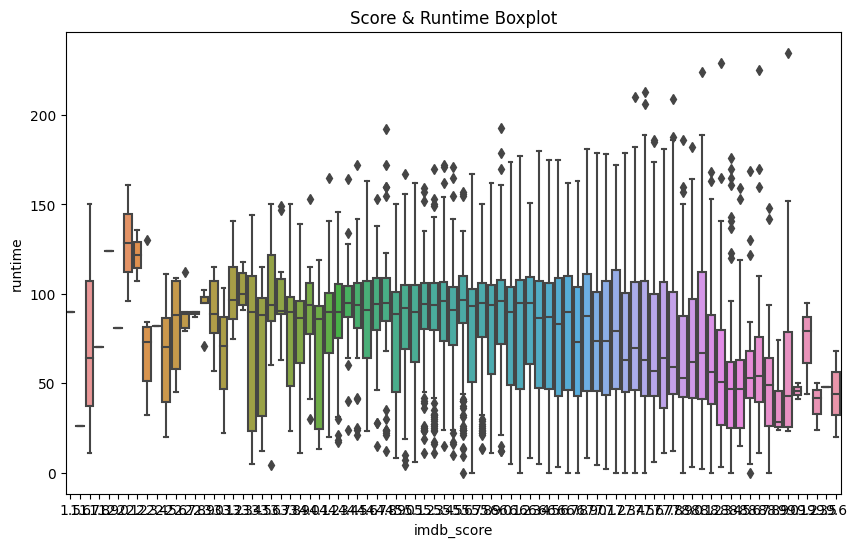

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='imdb_score', y='runtime')
plt.title("Score & Runtime Boxplot")
plt.show()

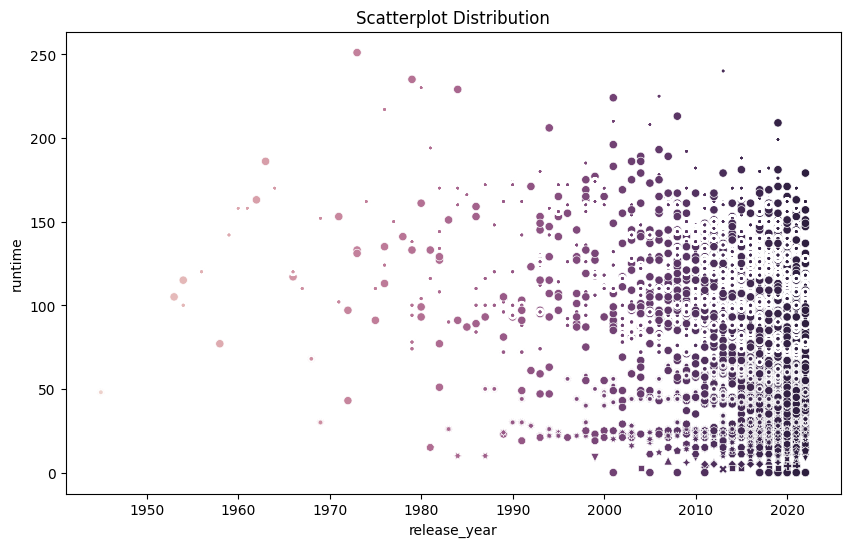

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='release_year', y='runtime', legend=False, hue='release_year', style='runtime')
plt.title("Scatterplot Distribution")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
correlation_matrix = df[['release_year','runtime']].corr()
print(correlation_matrix)

              release_year   runtime
release_year      1.000000 -0.211076
runtime          -0.211076  1.000000


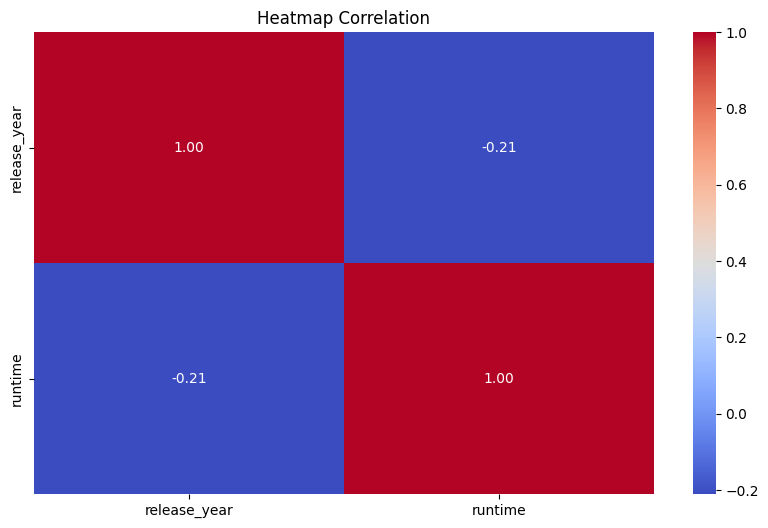

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Correlation")
plt.show()

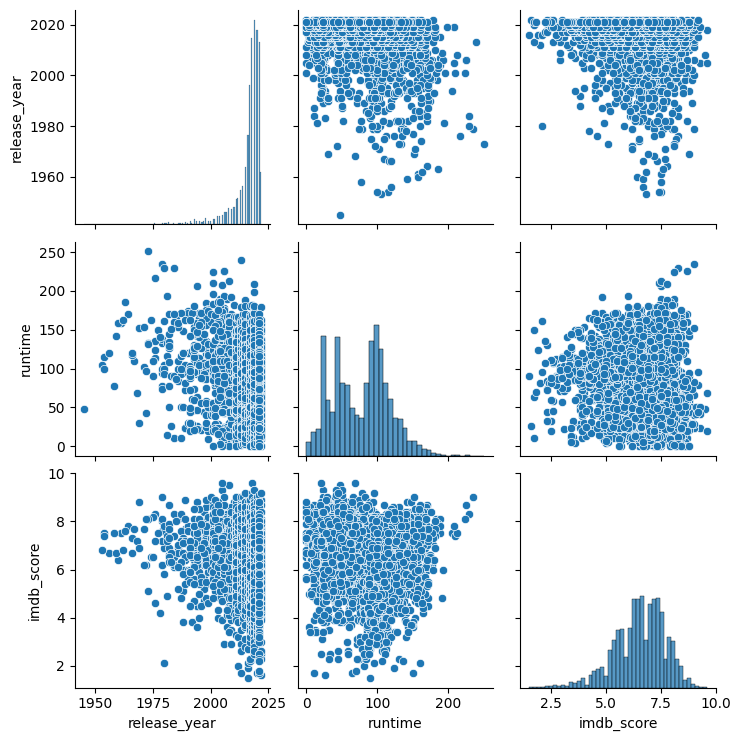

In [ ]:
sns.pairplot(df[['release_year','runtime','genres','imdb_score']])
#plt.title("Pairplot")
plt.show()

Preprocessing

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
imputer1 = SimpleImputer(strategy='most_frequent')
df['age_certification'] = imputer1.fit_transform(df[['age_certification']])
df

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,Age
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,TV-MA
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,R
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,PG
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,R
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,TV-MA,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0,TV-MA
5802,Edis Starlight,MOVIE,2021,TV-MA,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN,TV-MA
5803,Clash,MOVIE,2021,TV-MA,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0,TV-MA
5804,Shadow Parties,MOVIE,2021,TV-MA,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,TV-MA


In [ ]:
imputer1 = SimpleImputer(strategy='constant', fill_value=0)
df['seasons'] = imputer1.fit_transform(df[['seasons']])
df

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,Age
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,TV-MA
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],0.0,tt0075314,8.3,795222.0,R
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],0.0,tt0071853,8.2,530877.0,PG
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],0.0,tt0079470,8.0,392419.0,R
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],0.0,tt0070047,8.1,391942.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,TV-MA,100,"['romance', 'drama']",['NG'],0.0,tt13857480,6.9,39.0,TV-MA
5802,Edis Starlight,MOVIE,2021,TV-MA,74,"['music', 'documentation']",[],0.0,NaN,NaN,NaN,TV-MA
5803,Clash,MOVIE,2021,TV-MA,88,"['family', 'drama']","['NG', 'CA']",0.0,tt14620732,6.5,32.0,TV-MA
5804,Shadow Parties,MOVIE,2021,TV-MA,116,"['action', 'thriller']",[],0.0,tt10168094,6.2,9.0,TV-MA
